In [33]:
# Import dependicies
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


In [34]:
# Import from the main.ipynb file
df = pd.read_csv("output/offences_dates.csv", index_col=0)


In [35]:
# Add an additonal column to the csv that shows what season of the year the crimes have occured
# Add a function that returns the season given to a month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

# Create a new column in the DataFrame with the Seasons
df['Season'] = df['Month'].apply(get_season)

# Convert the 'Reported Date' column to a datetime object
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

# Create a new column for the day of the week
df['DayOfWeek'] = df['Reported Date'].dt.day_name()

# Display rows
df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Month,Year,Season,DayOfWeek
0,2013-07-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2,7,2013,Winter,Monday
1,2013-07-01,ALDINGA BEACH,5173,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1,7,2013,Winter,Monday
2,2013-07-01,ALDINGA BEACH,5173,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,7,2013,Winter,Monday
3,2013-07-01,BEDFORD PARK,5042,OFFENCES AGAINST THE PERSON,ROBBERY AND RELATED OFFENCES,Blackmail and extortion,1,7,2013,Winter,Monday
4,2013-07-01,BURTON,5110,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1,7,2013,Winter,Monday


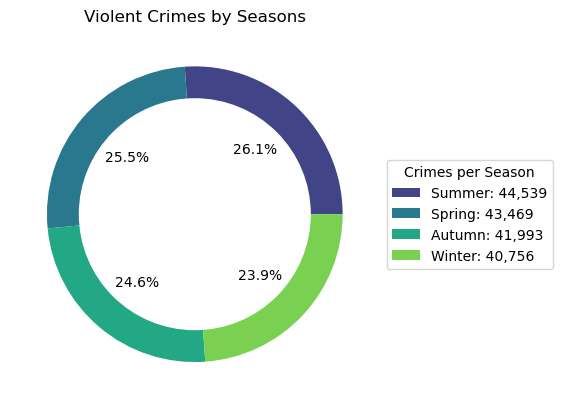

In [36]:
# Calculate the number of crimes based on the Season
crimes_by_season = df.groupby('Season').size()

# Sort the total number of Crimes, by highest to lowest value
crimes_by_season = crimes_by_season.sort_values(ascending=False)

# Define the colors for the pie chart slices
colours = sns.color_palette('viridis', n_colors=4)

# Create a pie chart that shows the number of crimes per season
wedges, texts, autotexts = plt.pie(crimes_by_season, colors=colours, autopct='%1.1f%%')

# Add the title
plt.title('Violent Crimes by Seasons')

# Change labels for the legend to show crimes_by_season instead
legend_labels = [f'{season}: {format(count, ",")}' for season, count in crimes_by_season.items()]

# Add the legend
plt.legend(wedges, legend_labels, title='Crimes per Season', loc='center left', bbox_to_anchor=(1, 0.5))

# Add a white circle at the center to create a donut chart
my_circle=plt.Circle( (0,0), 0.78, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Plot the pie chart
plt.show()

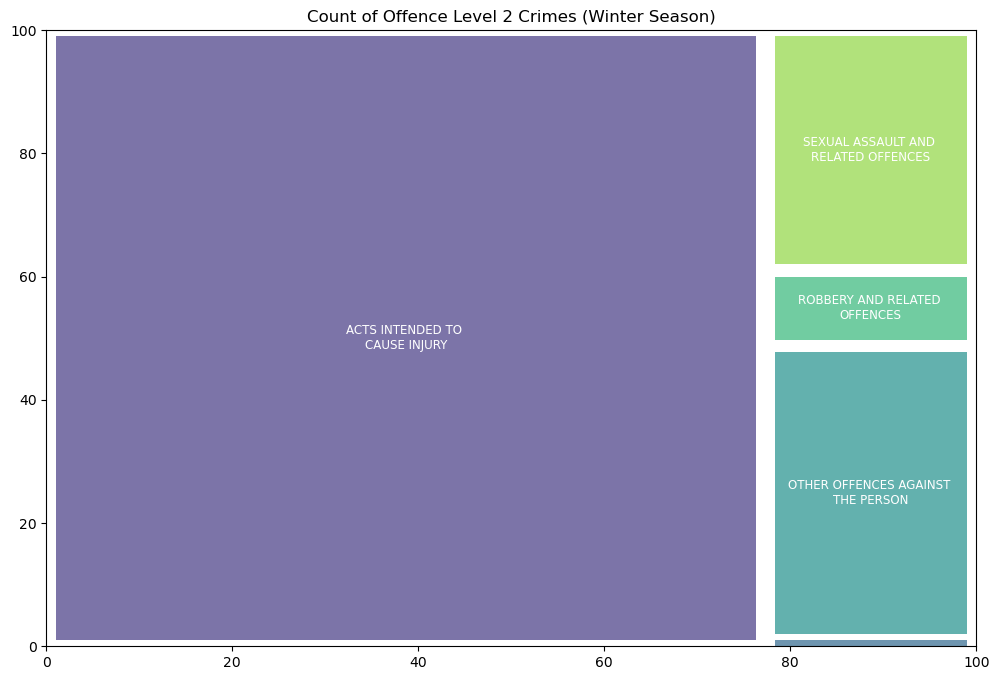

In [37]:
# Group data by Offence Level 2 Description and aggregate Offence count using sum function
df_grouped = df.groupby('Offence Level 2 Description')['Offence count'].sum().reset_index()

# Insert line breaks after every 2 words in the labels and exclude the label for Homicide and related offences
labels = []
for label in df_grouped['Offence Level 2 Description']:
    if label == 'HOMICIDE AND RELATED OFFENCES':
        labels.append('')
    else:
        words = label.split()
        new_label = ''
        for i in range(len(words)):
            new_label += words[i] + ' '
            if (i + 1) % 3 == 0:
                new_label += '\n'
        labels.append(new_label.strip())

# Set figure size
plt.figure(figsize=(12, 8))

# Create a color palette for the treemap plot
colors = sb.color_palette("viridis", len(df_grouped))

# Create a treemap plot using grouped data and set text_kwargs, color, and pad parameters
squarify.plot(sizes=df_grouped['Offence count'], label=labels, alpha=.7, color=colors, pad=0.5, text_kwargs={'fontsize': 8.5, 'color': 'white'})

# Add a title to the plot
plt.title('Count of Offence Level 2 Crimes (Winter Season)')

# Add axis labels to the plot
plt.xlabel('')
plt.ylabel('')

plt.axis()
plt.show()

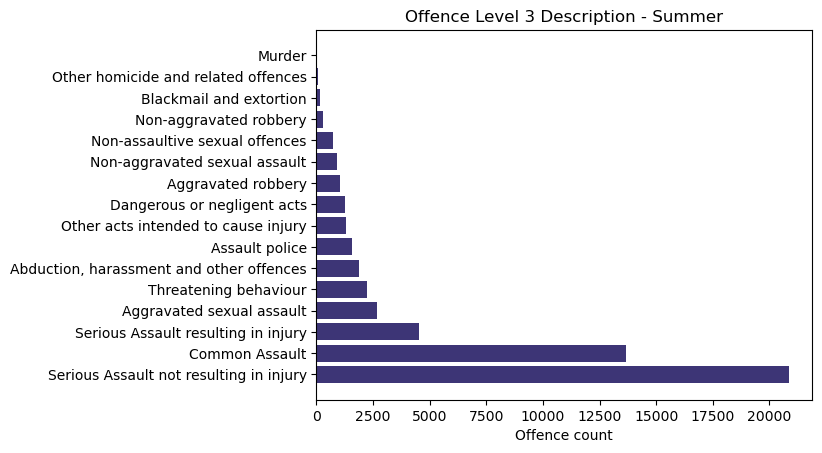

In [38]:
# Filter the data for the Summer season
summer_df = df[df['Season'] == 'Summer']

# Group the data by Offence Level 3 Description and sum the Offence count
offence_counts = summer_df.groupby('Offence Level 3 Description')['Offence count'].sum().sort_values(ascending=False)

# Create a horizontal bar plot
plt.barh(offence_counts.index, offence_counts.values, color='#3D3576')
plt.xlabel('Offence count')
plt.title('Offence Level 3 Description - Summer')
plt.show()

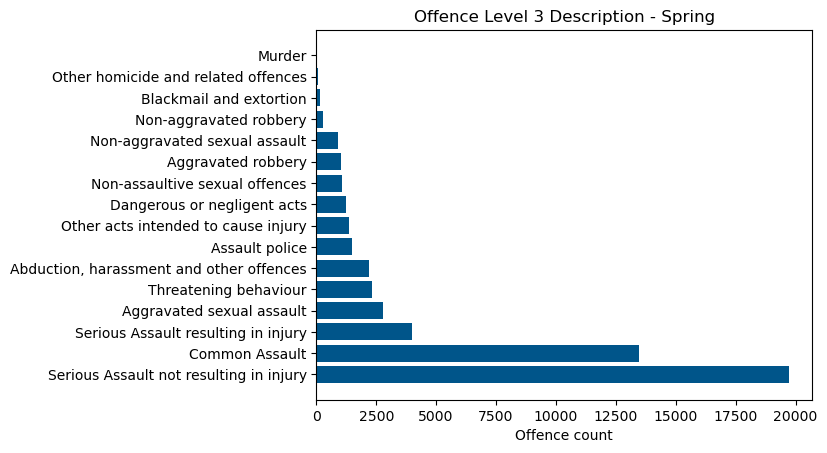

In [39]:
# Filter the data for the Winter season based on the 'Season' column
spring_df = df[df['Season'] == 'Spring']

# Group the data by 'Offence Level 3 Description' and sum the 'Offence count' column for each group
offence_counts = spring_df.groupby('Offence Level 3 Description')['Offence count'].sum().sort_values(ascending=False)

# Create a horizontal bar plot
plt.barh(offence_counts.index, offence_counts.values, color='#00558A')
plt.xlabel('Offence count')
plt.title('Offence Level 3 Description - Spring')
plt.show()


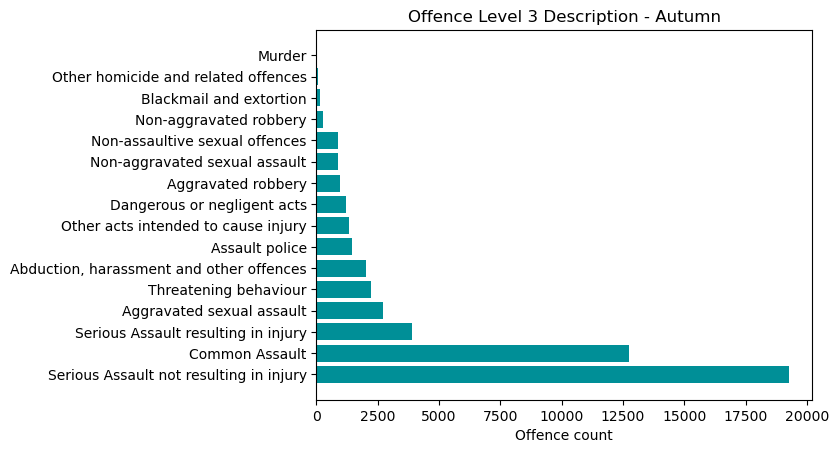

In [40]:
# Filter the data for the Winter season based on the 'Season' column
autumn_df = df[df['Season'] == 'Autumn']

# Group the data by 'Offence Level 3 Description' and sum the 'Offence count' column for each group
offence_counts = autumn_df.groupby('Offence Level 3 Description')['Offence count'].sum().sort_values(ascending=False)

# Create a horizontal bar plot
plt.barh(offence_counts.index, offence_counts.values, color='#008F97')
plt.xlabel('Offence count')
plt.title('Offence Level 3 Description - Autumn')
plt.show()

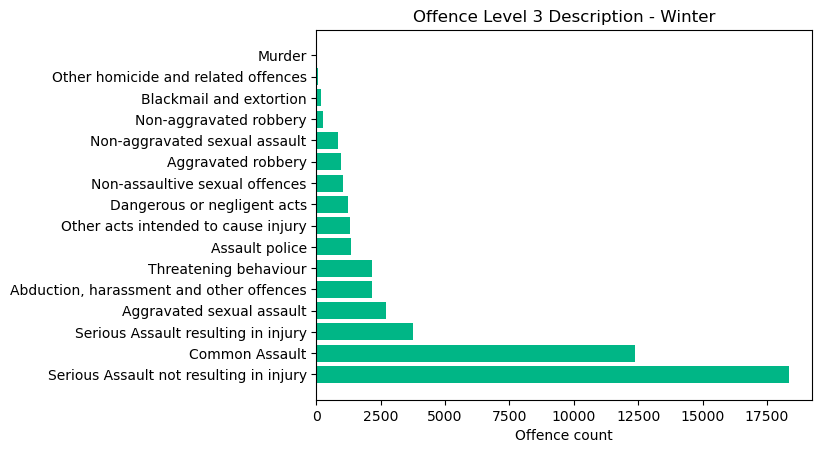

In [41]:
# Filter the data for the Winter season based on the 'Season' column
winter_df = df[df['Season'] == 'Winter']

# Group the data by 'Offence Level 3 Description' and sum the 'Offence count' column for each group
offence_counts = winter_df.groupby('Offence Level 3 Description')['Offence count'].sum().sort_values(ascending=False)

# Create a horizontal bar plot
plt.barh(offence_counts.index, offence_counts.values, color='#00B686')
plt.xlabel('Offence count')
plt.title('Offence Level 3 Description - Winter')
plt.show()